Load a 2 ply point clouds and rotate one


<function matplotlib.pyplot.show(close=None, block=None)>

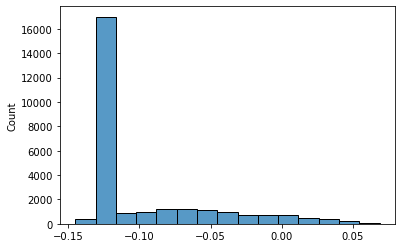

In [49]:
import open3d as o3d
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Load a 2 ply point clouds and rotate one")
front_pcd = o3d.io.read_point_cloud(r"data\Toy Truck PLY files\360 degree.ply")
back_pcd = o3d.io.read_point_cloud(r"data\Toy Truck PLY files\180 degree.ply")
side_pcd= o3d.io.read_point_cloud(r"data\Toy Truck PLY files\90 degree.ply")
side2_pcd = o3d.io.read_point_cloud(r"data\Toy Truck PLY files\270 degree.ply")
top_pcd = o3d.io.read_point_cloud(r"data\Toy Truck PLY files\top_view.ply") 

#make new array of the xyz cords of each point cloud
side_pcd_as_array= np.asarray(side_pcd.points)
side_pcd_as_color_array = np.asarray(side_pcd.colors)



#colors = np.asarray(back_pcd.colors)
#print(colors[0])

#Filter Point Clouds
filtered_side_array = side_pcd_as_array[side_pcd_as_array[:,1] > -0.11]



sns.histplot(side_pcd_as_array[:,1],bins=15)

plt.show

<AxesSubplot:ylabel='Count'>

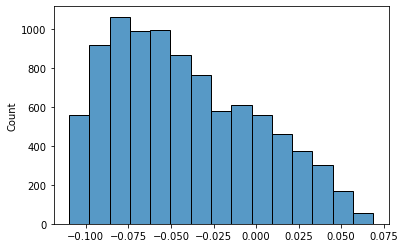

In [14]:
sns.histplot(filtered_side_array[:,1],bins=15)

<AxesSubplot:>

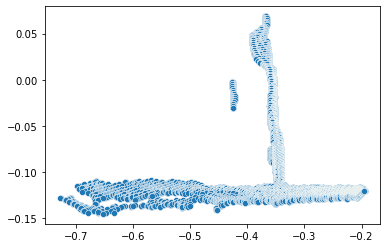

In [16]:
sns.scatterplot(x=side_pcd_as_array[:,2], y=side_pcd_as_array[:,1])

<AxesSubplot:>

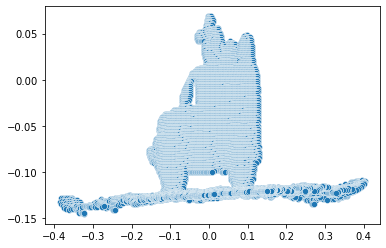

In [17]:
sns.scatterplot(x=side_pcd_as_array[:,0], y=side_pcd_as_array[:,1])

In [1]:
filtered_side_array = side_pcd_as_array[side_pcd_as_array[:,1] < -0.11]

NameError: name 'side_pcd_as_array' is not defined

<AxesSubplot:>

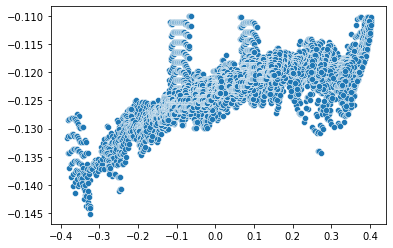

In [32]:
sns.scatterplot(x=filtered_side_array[:,0], y=filtered_side_array[:,1])

In [30]:
import pandas as pd

filtered_side_df = pd.DataFrame(filtered_side_array,columns=["x","y","z"])

filtered_side_df

,x,y,z
0,0.269775,-0.114624,-0.693359
1,0.272949,-0.114441,-0.692383
2,0.276855,-0.114624,-0.693359
3,0.294922,-0.114624,-0.693359
4,0.300537,-0.115417,-0.698242
...,...,...,...
17901,0.147095,-0.120544,-0.195679
17902,0.148071,-0.120544,-0.195679
17903,0.149048,-0.120544,-0.195679
17904,0.150146,-0.120544,-0.195679


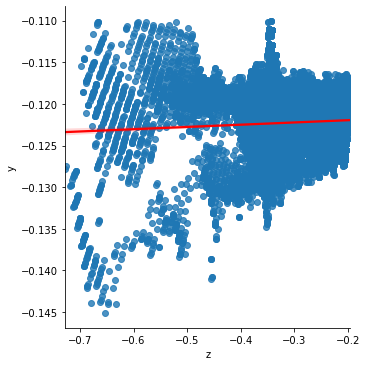

In [34]:
sns.lmplot(x="z", y="y", data=filtered_side_df, line_kws={'color': 'red'})

In [35]:
from sklearn import linear_model as lm

In [36]:
y_df = filtered_side_df[['y']]
X_df = filtered_side_df[['x', 'z']]

In [37]:
OLSmodel = lm.LinearRegression().fit(X_df,y_df)

In [39]:
#Error of regression line
OLSmodel_R2 = OLSmodel.score(X_df,y_df)
OLSmodel_R2

0.7259899846201596

In [40]:
def DisplayRegressParams (OLSmodel, OLSmodel_R2, X_df):
    StatsList = ['Intercept']
    ValuesList = [OLSmodel.intercept_[0]]
    for count, col in enumerate(X_df.columns):
        StatsList.append(col + '_coef')
        ValuesList.append(OLSmodel.coef_[0][count])
    StatsList.append('R^2')
    ValuesList.append(OLSmodel_R2)
    statsDict = {'Stats':StatsList,'Values':ValuesList}
    Regress_Params_df = pd.DataFrame(statsDict)
    return Regress_Params_df

DisplayRegressParams(OLSmodel, OLSmodel_R2, X_df)



#equation made = OLSmodel.intercept_[0] + OLSmodel.coef_[0][0] * x + OLSmodel.coef_[0][1] * z
#for any x and z this give you a y. 

,Stats,Values
0,Intercept,-0.119921
1,x_coef,0.023348
2,z_coef,0.011700
3,R^2,0.725990


In [47]:
bias = 0.008

filtered_side_array_with_regress = side_pcd_as_array[side_pcd_as_array[:,1] > (OLSmodel.intercept_[0] 
                                                                  + OLSmodel.coef_[0][0] 
                                                                  * side_pcd_as_array[:,0] 
                                                                  + OLSmodel.coef_[0][1] 
                                                                  * side_pcd_as_array[:,2] + bias)]

<AxesSubplot:>

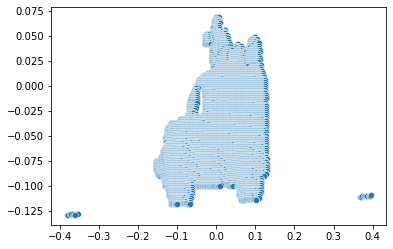

In [48]:
sns.scatterplot(x=filtered_side_array_with_regress[:,0], y=filtered_side_array_with_regress[:,1])

In [ ]:
Linear Regression to filter floor.  

Stats Model OLS regression. Sk learn


In [3]:
!pip install open3d